## Toxic Comment Classification Using Deep Learning

Study of negative online behaviour. We need to be able to classify text and discern between different levels of toxicity and disrespectful behaviour - such as like threats, obscenity, insults, and identity-based hate etc

In [2]:
import numpy as np
import pandas as pd
from IPython.display import display

raw_data = pd.read_csv('../data/train.csv', encoding="utf-8")
display(raw_data.head())

id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0

In [3]:
raw_data.toxic.value_counts()

0    144277
1     15294
Name: toxic, dtype: int64

In [4]:
raw_data

id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        toxic  severe_toxic  obscene  threat  insult  identity_hate  
0           0             0        0       0       0              0  
1           0             0        0       0       0              0  
2           0             0        0       0       0              0  
3           0             0        0       0       0              0  
4           0             0        0       0       0              0  
...       ...           ...      ...     ...     ...            ...  
159566      0             0        0       0       0              0  
159567      0             0        0       0       0              0  
159568      0             0        0       0       0              0  
159569      0             0        0       0       0              0  
159570      0             0        0       0       0              0  

[159571 rows x 8 columns]

### Word2Vec

Vectorize the text

In [5]:
import nltk
import sklearn
import gensim
from nltk import word_tokenize, sent_tokenize
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
from nltk.corpus import stopwords
import matplotlib.pyplot as plt                        
%matplotlib inline

class vectorizer(object):
    def __init__(self, vector_method, size, sg, window, min_count, seed, workers, sents):
        self._vector_method = vector_method
        self._size = size
        self._sg = sg
        self._window = window
        self._min_count = min_count
        self._seed = seed
        self._sents = sents
        self._workers = workers
        
    def vectorize_model(self):
        model = self._vector_method(sentences=self._sents, vector_size =self._size, sg=self._sg,
                 window=self._window, min_count=self._min_count, seed=self._seed,
                 workers=self._workers)
        
        return model
        

In [6]:
# print(raw_data['comment_text'][:2])
def parse_sentences():
    sentences = []
    for index, row in raw_data.iterrows():
        text = row['comment_text']
        sent = list(sent_tokenize(text.lower()))
        sentences.append(sent)

    return sentences

def word_process(some_text):
    stop_words = set(stopwords.words('english'))    
    words = word_tokenize(some_text[0].lower())
    
    filtered_words = []
    for w in words:
        if w not in stop_words:
            filtered_words.append(w)
            
    return list(words) 

def parse_raw():
    documents = []
    sents = parse_sentences()
    for sent in sents:
        processed = word_process(sent)
        documents.append(processed)
    
    return documents

sentences = parse_raw()
# print(sentences)

word2vec_method = vectorizer(Word2Vec, 64, 1, 10, 3, 42, 2, sentences)
word2vec_model = word2vec_method.vectorize_model()
print('done processing')


done processing


In [7]:
# print(word2vec_model.wv.vocab)
# print(word2vec_model['fuck'])
print(word2vec_model.wv.most_similar('fuck'))

[('vuvuzelas', 0.8115749359130859), ('screw', 0.8063658475875854), ('suppressing', 0.8039761185646057), ('fascists', 0.7957555055618286), ('sıde', 0.782496988773346), ('dianna', 0.7793252468109131), ('fucky', 0.7756155133247375), ('suede', 0.7740898132324219), ('cocksucker', 0.7726595997810364), ('you==', 0.7724149227142334)]


          x         y token
0  3.363057  0.431761     .
1  1.753845  2.207216   the
2  3.339305  0.268159     ,
3  1.140561  1.783512    ``
4  4.952366 -0.024306     i


<AxesSubplot:xlabel='x', ylabel='y'>

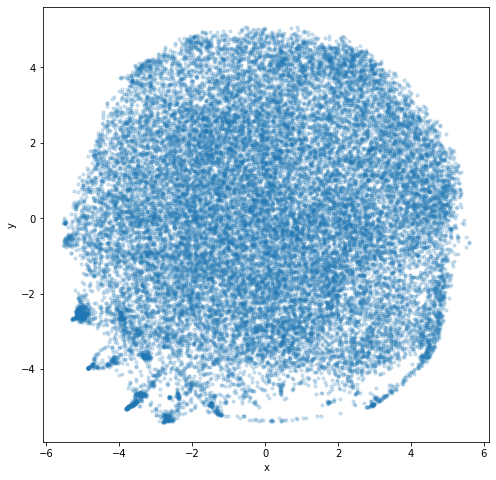

In [8]:
tsne = TSNE(n_components=2, n_iter=300)

X = word2vec_model.wv[word2vec_model.wv.key_to_index]
X_2d = tsne.fit_transform(X)
coords_df = pd.DataFrame(X_2d, columns=['x', 'y'])
coords_df['token'] = list(word2vec_model.wv.index_to_key)

print(coords_df.head())

# Plot the graph.
coords_df.plot.scatter('x', 'y', figsize=(8,8),
                       marker='o', s=10, alpha=0.2)

In [24]:
X_2d

array([[ 3.3630567 ,  0.4317607 ],
       [ 1.7538453 ,  2.2072158 ],
       [ 3.339305  ,  0.26815858],
       ...,
       [-1.5386863 ,  1.1596123 ],
       [ 1.9407694 , -1.4468923 ],
       [-0.05060188, -2.1833203 ]], dtype=float32)

In [19]:
import plotly.express as px
fig = px.scatter(x = coords_df['x'],y = coords_df['y'])


In [39]:
coords_df.sort_values(by = ['y', 'x'], ascending = [False, False]).head(10)

x         y       token
2619 -0.509804  5.076811    scholars
702   0.879066  5.072351   published
2958 -0.549636  5.061453  historians
341  -0.027013  5.048306        word
1988  0.709250  5.048018     journal
1043  0.008806  5.026597     meaning
2461 -0.200776  5.024034    commonly
1185 -0.500332  5.020015    religion
1307 -0.029400  5.018607      phrase
1450 -0.332327  5.002839       islam

In [21]:
fig.show()

In [11]:
pip install plotly

  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)
Note: you may need to restart the kernel to use updated packages.


We define the features and labels

In [18]:
# clean up the docs and labels a bit
all_docs = list(raw_data['comment_text'])
all_labels = np.array(list(raw_data['toxic']))

def retrieve_toxic_data():
    toxic_docs = []
    toxic_labels = []
    for index, row in raw_data.iterrows():
        if int(row['toxic']) == 1:
            toxic_docs.append(row['comment_text'])
            toxic_labels.append(raw_data.iloc[index,3:])
            
    return toxic_docs, np.array(toxic_labels), len(toxic_docs)

toxic_docs, toxic_labels, toxic_entries = retrieve_toxic_data()    

print(toxic_docs[:2])
print(toxic_labels[:6])
print(toxic_entries)

['COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK', 'Hey... what is it..\n@ | talk .\nWhat is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG UP any one who asks them questions abt their ANTI-SOCIAL and DESTRUCTIVE (non)-contribution at WP?\n\nAsk Sityush to clean up his behavior than issue me nonsensical warnings...']
[[1 1 0 1 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 1 0 1 1]
 [0 1 0 1 0]
 [0 0 0 0 0]]
15294


### Feed-forward neural network

In [47]:
import keras
import pickle
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Dropout, Dense, Flatten
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD

class neural_network(object):
    def __init__(self, docs, labels, epochs, batch_size, dropout):
        self._model = Sequential()
        self._docs = docs
        self._labels = labels
        self._epochs = epochs
        self._batch_size = batch_size
        self._dropout = dropout
     
    def split_data(self, docs, targets):
        length = len(docs)
        split_point = int(round(length * 0.8))
        return docs[:split_point], targets[:split_point], docs[split_point:], targets[split_point:]
        
    def prepare_docs(self, max_length):
        t = Tokenizer(num_words=5000)
        t.fit_on_texts(self._docs)
        vocab_size = len(t.word_index) + 1
        encoded_docs = t.texts_to_sequences(self._docs)
        padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
        return padded_docs, t
    
    # only put in top 5000 words?
    def calc_embedding_matrix(self, vocab_size, t):
        embedding_matrix = np.zeros((vocab_size, 64))
        for word, i in t.word_index.items():
            if word in word2vec_model.wv.key_to_index:
                embedding_vector = word2vec_model.wv[word]
                if embedding_vector is not None:
                    embedding_matrix[i] = embedding_vector
                
        return embedding_matrix
    
    def construct_model(self, vocab_size, max_length, embedding_matrix):
        
        embedding_layer = Embedding(vocab_size, 64, weights=[embedding_matrix], input_length=max_length)
        embedding_layer.trainable = False
        
        self._model.add(embedding_layer)
        self._model.add(Flatten())
        self._model.add(Dense(64, activation='relu'))
        self._model.add(Dense(64, activation='relu'))
        self._model.add(Dropout(self._dropout))
        self._model.add(Dense(1, activation='sigmoid'))
        self._model.summary()
        
    def compile_model(self):
        sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
        self._model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
        checkpointer = ModelCheckpoint(filepath='saved_models/weights.feed_forward_network.hdf5', 
                               verbose=1, save_best_only=True)
        
        return checkpointer
        
    def train_save_model(self, train_docs, train_targets, valid_docs, valid_targets, checkpointer):
        trained_model = self._model.fit(train_docs, train_targets, validation_data=(valid_docs, valid_targets), 
                          epochs=self._epochs, batch_size=self._batch_size, callbacks=[checkpointer], verbose=1)

        with open('pickles/feed_forward_network', 'wb') as file_pi:
            pickle.dump(trained_model.history, file_pi)
            
        return trained_model
            
    def get_model(self):
        return self._model

In [28]:
feed_forward_network = neural_network(all_docs, all_labels, 8, 32, 0.5)
padded_docs, t = feed_forward_network.prepare_docs(150)

In [29]:
embedding_matrix = feed_forward_network.calc_embedding_matrix(len(t.word_index) + 1, t)
# print(embedding_matrix)

In [30]:
train_valid_docs, train_valid_targets, test_docs, test_targets = feed_forward_network.split_data(padded_docs, all_labels)
train_docs, train_targets, valid_docs, valid_targets = feed_forward_network.split_data(train_valid_docs, train_valid_targets)

In [31]:
feed_forward_network.construct_model(len(t.word_index) + 1, 150, embedding_matrix)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 64)           13461632  
                                                                 
 flatten (Flatten)           (None, 9600)              0         
                                                                 
 dense (Dense)               (None, 64)                614464    
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 14,080,321
Trainable params: 618,689
Non

In [32]:
checkpointer = feed_forward_network.compile_model()

C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [33]:
trained_feed_forward_model = feed_forward_network.train_save_model(train_docs, train_targets, valid_docs, valid_targets, checkpointer)

Epoch 1/8
3179/3192 [============================>.] - ETA: 0s - loss: 0.1698 - accuracy: 0.9407
Epoch 1: val_loss improved from inf to 0.15101, saving model to saved_models\weights.feed_forward_network.hdf5
3192/3192 [==============================] - 9s 3ms/step - loss: 0.1698 - accuracy: 0.9407 - val_loss: 0.1510 - val_accuracy: 0.9453
Epoch 2/8
3185/3192 [============================>.] - ETA: 0s - loss: 0.1378 - accuracy: 0.9494
Epoch 2: val_loss did not improve from 0.15101
3192/3192 [==============================] - 9s 3ms/step - loss: 0.1378 - accuracy: 0.9494 - val_loss: 0.1545 - val_accuracy: 0.9447
Epoch 3/8
3187/3192 [============================>.] - ETA: 0s - loss: 0.1274 - accuracy: 0.9529
Epoch 3: val_loss did not improve from 0.15101
3192/3192 [==============================] - 9s 3ms/step - loss: 0.1275 - accuracy: 0.9530 - val_loss: 0.1541 - val_accuracy: 0.9452
Epoch 4/8
3192/3192 [==============================] - ETA: 0s - loss: 0.1173 - accuracy: 0.9565
Epoch 4:

### Get the predictions and evaluate the accuracy

In [55]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import roc_auc_score

# test_docs, test_targets

class predictive_evaluate(object):
    def __init__(self, test_docs, test_targets, model):
        self._test_docs = test_docs
        self._test_targets = test_targets
        self._model = model
        
    def get_predictions(self):
        predictions = []
        for doc in self._test_docs:
            result = self._model.predict(np.expand_dims(doc, axis=0))
            preds = result[0][0]
            predictions.append(1 if preds >= 0.5 else 0)
                    
        return predictions
    
    def get_multilabel_predictions(self):
        predictions = []
        for doc in self._test_docs:
            result = self._model.predict(np.expand_dims(doc, axis=0))
            preds = result[0]
            preds[preds >= 0.5] = 1
            preds[preds < 0.5] = 0 
            predictions.append(preds)
                    
        return predictions
        
    def get_metrics(self, predictions):
        # print(self._test_targets[0])
        # print(predictions[0])
        model_recall_score = recall_score(self._test_targets, predictions, average='weighted')
        model_precision_score = precision_score(self._test_targets, predictions, average='weighted')
        model_f1_score = f1_score(self._test_targets, predictions, average='weighted')
        
        return model_recall_score, model_precision_score, model_f1_score
        

In [35]:
model = feed_forward_network.get_model()
model.load_weights('saved_models/weights.feed_forward_network.hdf5')

evaluation = predictive_evaluate(test_docs, test_targets, model)
predictions = np.array(evaluation.get_predictions()).astype(int)

print(predictions[100:110])

1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 12ms/step
[0 0 0 0 0 0 0 0 0 0]


In [36]:
model_recall_score = recall_score(np.array(test_targets), predictions, average='weighted')
model_precision_score = precision_score(np.array(test_targets), predictions, average='weighted')
model_fbeta_score = fbeta_score(np.array(test_targets), predictions, average='weighted', beta=1)

print('Recall score:', model_recall_score)
print('Precision score:', model_precision_score)
print('F-beta score:', model_fbeta_score)

Recall score: 0.9480792128846275
Precision score: 0.944344394929847
F-beta score: 0.9436583342946436


### Try a convolutional neural network

In [51]:
from keras.layers import Conv1D, SpatialDropout1D, GlobalMaxPool1D, MaxPooling1D
from keras.optimizers import SGD

class cnn_neural_network(neural_network):
    def __init__(self, docs, labels, epochs, batch_size, dropout, pad, drop_embed, n_conv, k_conv):
        super(cnn_neural_network, self).__init__(docs, labels, epochs, batch_size, dropout)
        self._pad = pad
        self._drop_embed = drop_embed
        self._n_conv = n_conv
        self._k_conv = k_conv
        
    def prepare_docs(self, max_length):
        t = Tokenizer(num_words=5000)
        t.fit_on_texts(self._docs)
        vocab_size = len(t.word_index) + 1
        encoded_docs = t.texts_to_sequences(self._docs)
        padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding=self._pad, truncating=self._pad, value=0)
        return padded_docs, t
    
    def construct_model(self, vocab_size, max_length, embedding_matrix):
        
        embedding_layer = Embedding(vocab_size, 64, weights=[embedding_matrix], input_length=max_length)
        embedding_layer.trainable = False
        
        self._model.add(embedding_layer)
        self._model.add(SpatialDropout1D(self._drop_embed))
        self._model.add(Conv1D(self._n_conv, self._k_conv, activation='relu'))
        self._model.add(MaxPooling1D(pool_size = 2))
        self._model.add(Conv1D(self._n_conv * 2, self._k_conv, activation='relu'))
        self._model.add(MaxPooling1D(pool_size = 2))
        self._model.add(Conv1D(self._n_conv * 4, self._k_conv, activation='relu'))
        self._model.add(GlobalMaxPool1D())
        self._model.add(Dense(self._n_conv, activation='relu'))
        self._model.add(Dropout(self._dropout))
        self._model.add(Dense(1, activation='sigmoid'))
        self._model.summary()
        
    def construct_toxic_model(self, vocab_size, max_length, embedding_matrix):
        
        embedding_layer = Embedding(vocab_size, 64, weights=[embedding_matrix], input_length=max_length)
        embedding_layer.trainable = False
        
        self._model.add(embedding_layer)
        self._model.add(SpatialDropout1D(self._drop_embed))
        self._model.add(Conv1D(self._n_conv, self._k_conv, activation='relu'))
        self._model.add(MaxPooling1D(pool_size = 2))
        self._model.add(Conv1D(self._n_conv * 2, self._k_conv, activation='relu'))
        self._model.add(GlobalMaxPool1D())
        self._model.add(Dense(self._n_conv, activation='relu'))
        self._model.add(Dropout(self._dropout))
        self._model.add(Dense(1, activation='sigmoid'))
        self._model.summary()
        
    def compile_model(self, model_name):
        sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
        self._model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
        checkpointer = ModelCheckpoint(filepath='saved_models/' + model_name, 
                               verbose=1, save_best_only=True)
        
        return checkpointer
        
    def train_save_model(self, train_docs, train_targets, valid_docs, valid_targets, checkpointer, model_name):
        trained_model = self._model.fit(train_docs, train_targets, validation_data=(valid_docs, valid_targets), 
                          epochs=self._epochs, batch_size=self._batch_size, callbacks=[checkpointer], verbose=1)

        with open('pickles/cnn_network' + model_name, 'wb') as file_pi:
            pickle.dump(trained_model.history, file_pi)
            
        return trained_model
            
    def get_model(self):
        return self._model
    

In [52]:
# downsampling
def downsample(docs, labels):
    downsample_index = 0
    for index, label in enumerate(labels):
        if int(label) == 1 and int(labels[index + 1]) == 0:
            del docs[index + 1]
            del labels[index + 1]
            
    return docs, np.array(labels) , len(docs)

def filter_df(filter_limit, raw_df):
    dataframe = raw_df.copy()
    dataframe = dataframe.sort_values('toxic', ascending=True)
    dataframe = dataframe.reset_index(drop=True)
    dataframe = dataframe.iloc[filter_limit:]

    return dataframe.sample(frac=1).reset_index(drop=True)
        
dataframe = filter_df(100000, raw_data)
display(dataframe.head())
display(dataframe.describe())

shrink_docs = list(dataframe['comment_text'])
shrink_labels = np.array(list(dataframe['toxic']))

id                                       comment_text  toxic  \
0  3439f58f9f23ae2a  "\n\nNope, Hog-baiting should be a ""fork"".    "      0   
1  b5c1e4788b821534  Breakaway Repubic =/=Breakaway region \n\nWhat...      0   
2  bab83701a6feec71  Hi \nHi . Just to be clear, I haven't made any...      0   
3  2e9a80009c4582fc          am doing a project and i want imformation      0   
4  8671b5871c527fc5  Oooooh. Thanks Buster. I eat turkey and ham, s...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0

toxic  severe_toxic       obscene        threat        insult  \
count  59571.000000  59571.000000  59571.000000  59571.000000  59571.000000   
mean       0.256736      0.026775      0.135704      0.007705      0.126051   
std        0.436836      0.161426      0.342476      0.087441      0.331910   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        1.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       identity_hate  
count   59571.000000  
mean        0.022377  
std         0.147906  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000

In [53]:
# epochs = 15
# batch_size = 128
# dropout = 0.5
# pad = 'pre'
# skip = 50
# drop_embed = 0.2
# n_conv = 256
# k_conv = 3

cnn_network = cnn_neural_network(shrink_docs, shrink_labels, 8, 16, 0.5, 'post', 0.2, 256, 3)
padded_cnn_docs, t = cnn_network.prepare_docs(1500)
embedding_matrix = cnn_network.calc_embedding_matrix(len(t.word_index) + 1, t)

train_valid_docs, train_valid_targets, test_docs, test_targets = cnn_network.split_data(padded_cnn_docs, shrink_labels)
train_docs, train_targets, valid_docs, valid_targets = cnn_network.split_data(train_valid_docs, train_valid_targets)

def occurence_of_toxic(targets):
    occurence = 0
    for label in targets:
        if label == 1:
            occurence += 1
            
    return occurence / len(targets)

print(occurence_of_toxic(shrink_labels))
print(occurence_of_toxic(train_targets))
print(occurence_of_toxic(test_targets))

cnn_network.construct_model(len(t.word_index) + 1, 1500, embedding_matrix)
checkpointer = cnn_network.compile_model('cnn_network_binary.hdf5')
trained_cnn_model = cnn_network.train_save_model(train_docs, train_targets, valid_docs, valid_targets, checkpointer, 'cnn_network_binary')

model = cnn_network.get_model()
model.load_weights('saved_models/cnn_network_binary.hdf5')

evaluation = predictive_evaluate(test_docs, test_targets, model)
predictions = np.array(evaluation.get_predictions()).astype(int)

model_recall_score = recall_score(np.array(test_targets), predictions, average=None)
model_precision_score = precision_score(np.array(test_targets), predictions, average=None)
model_fbeta_score = fbeta_score(np.array(test_targets), predictions, average='weighted', beta=1)

print('Recall score:', model_recall_score)
print('Precision score:', model_precision_score)
print('F-beta score:', model_fbeta_score)

0.25673565996877673
0.25688506530976235
0.2548262548262548
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1500, 64)          7041472   
                                                                 
 spatial_dropout1d (SpatialD  (None, 1500, 64)         0         
 ropout1D)                                                       
                                                                 
 conv1d (Conv1D)             (None, 1498, 256)         49408     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 749, 256)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 747, 512)          393728    
                                                               

C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



2383/2383 [==============================] - ETA: 0s - loss: 0.2650 - accuracy: 0.8935
Epoch 1: val_loss improved from inf to 0.21471, saving model to saved_models\cnn_network_binary.hdf5
2383/2383 [==============================] - 590s 247ms/step - loss: 0.2650 - accuracy: 0.8935 - val_loss: 0.2147 - val_accuracy: 0.9106
Epoch 2/8
2383/2383 [==============================] - ETA: 0s - loss: 0.2193 - accuracy: 0.9124
Epoch 2: val_loss improved from 0.21471 to 0.19814, saving model to saved_models\cnn_network_binary.hdf5
2383/2383 [==============================] - 584s 245ms/step - loss: 0.2193 - accuracy: 0.9124 - val_loss: 0.1981 - val_accuracy: 0.9191
Epoch 3/8
2383/2383 [==============================] - ETA: 0s - loss: 0.2094 - accuracy: 0.9153
Epoch 3: val_loss did not improve from 0.19814
2383/2383 [==============================] - 576s 242ms/step - loss: 0.2094 - accuracy: 0.9153 - val_loss: 0.2125 - val_accuracy: 0.9107
Epoch 4/8
2383/2383 [==============================] - 

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 23ms/step
Recall score: [0.9540437  0.83366271]
Precision score: [0.94373259 0.86117727]
F-beta score: 0.9229536109688314


In [54]:
model_recall_score

array([0.9540437 , 0.83366271])

In [78]:
test_docs

array([[  61,    2,    1, ...,    0,    0,    0],
       [  19, 1293, 1162, ...,    0,    0,    0],
       [ 530, 2975, 3322, ...,    0,    0,    0],
       ...,
       [1619,  330,   46, ...,    0,    0,    0],
       [   7,   20,  729, ...,    0,    0,    0],
       [ 189,  851, 1425, ...,    0,    0,    0]])

In [79]:
test_targets

array([0, 0, 0, ..., 0, 0, 1])

In [80]:
model

In [81]:
y_pred_keras = model.predict(test_docs).ravel()
y_pred_keras

373/373 [==============================] - 49s 132ms/step


array([0.00799132, 0.00488278, 0.01147749, ..., 0.00491658, 0.01199687,
       0.9394302 ], dtype=float32)

In [82]:
y_pred_keras

array([0.00799132, 0.00488278, 0.01147749, ..., 0.00491658, 0.01199687,
       0.9394302 ], dtype=float32)

In [83]:
from sklearn.metrics import roc_curve
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_targets, y_pred_keras)

In [85]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

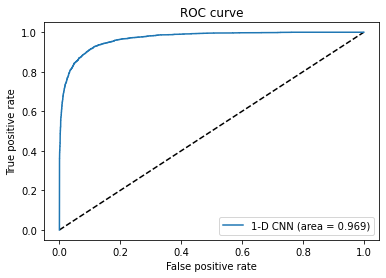

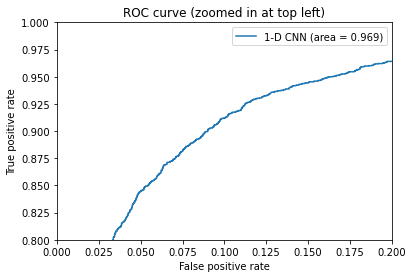

In [88]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='1-D CNN (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='1-D CNN (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

In [90]:
thresholds_keras

array([2.0000000e+00, 1.0000000e+00, 9.9999994e-01, ..., 1.0111046e-04,
       9.5136544e-05, 2.2307602e-05], dtype=float32)

In [89]:
model_recall_score = recall_score(np.array(test_targets), y_pred_keras, average=None)
model_precision_score = precision_score(np.array(test_targets), y_pred_keras, average=None)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
auc_keras = auc(fpr_keras, tpr_keras)

In [105]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(test_targets, y_pred_keras)

In [125]:
lr_precision, lr_recall, _ = precision_recall_curve(np.array(test_targets), y_pred_keras)
lr_auc = auc(lr_recall, lr_precision)
lr_auc

TypeError: 'numpy.float64' object is not callable

In [121]:
lr_precision

array([0.30963794, 0.30956752, 0.3095991 , ..., 1.        , 1.        ,
       1.        ])

In [116]:
no_skill = len(test_targets[test_targets==1]) / len(test_targets)

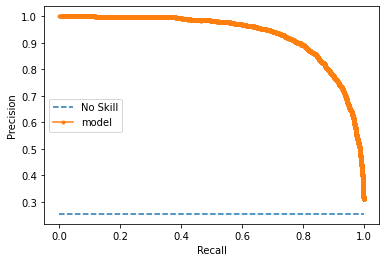

In [122]:
from matplotlib import pyplot
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='model')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [130]:
a = sklearn.metrics.auc(lr_recall, lr_precision)

In [131]:
a

0.9309445122343106

No Skill: ROC AUC=0.500
Model: ROC AUC=0.969


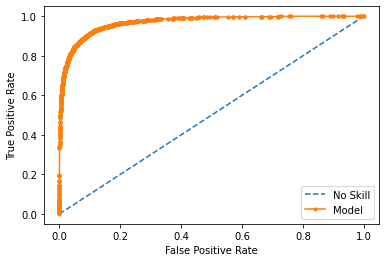

In [102]:
ns_probs = [0 for _ in range(len(test_targets))]
# fit a model
ns_auc = roc_auc_score(test_targets, ns_probs)
lr_auc = roc_auc_score(test_targets, y_pred_keras)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Model: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(test_targets, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(test_targets, y_pred_keras)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Model')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### Let's use a LSTM Neural Network

In [40]:
# Can we build binary classification models for more specific categories?
def occurence_of_labels(label_pos, labels):
    occurence = 0
    for label in labels:
        if int(label[label_pos]) == 1:
            occurence += 1
    
    return occurence / len(labels), occurence

frequency, total = occurence_of_labels(0, toxic_labels)
print(frequency, total)
frequency, total = occurence_of_labels(1, toxic_labels)
print(frequency, total)
frequency, total = occurence_of_labels(2, toxic_labels)
print(frequency, total)
frequency, total = occurence_of_labels(3, toxic_labels)
print(frequency, total)
frequency, total = occurence_of_labels(4, toxic_labels)
print(frequency, total)

0.10428926376356741 1595
0.5182424480188309 7926
0.02935791813783183 449
0.48018830914083954 7344
0.0851314240878776 1302


In [43]:
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

list_labels = raw_data[list_classes].values
list_docs = raw_data["comment_text"]

print(list_labels[:2])
print(list_docs[:2])

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]]
0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
Name: comment_text, dtype: object


In [48]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(list_docs))
list_tokenized_docs = tokenizer.texts_to_sequences(list_docs)

print(list_tokenized_docs[:2])


[[688, 75, 1, 126, 130, 177, 29, 672, 4511, 12052, 1116, 86, 331, 51, 2278, 11448, 50, 6864, 15, 60, 2756, 148, 7, 2937, 34, 117, 1221, 15190, 2825, 4, 45, 59, 244, 1, 365, 31, 1, 38, 27, 143, 73, 3462, 89, 3085, 4583, 2273, 985], [52, 2635, 13, 555, 3809, 73, 4556, 2706, 21, 94, 38, 803, 2679, 992, 589, 8377, 182]]


In [49]:
# Use padding for consistency in length
maxlen = 200
X_t = pad_sequences(list_tokenized_docs, maxlen=maxlen)

print(X_t[:2])

[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0   688    75     1
    126   130   177    29   672  4511 

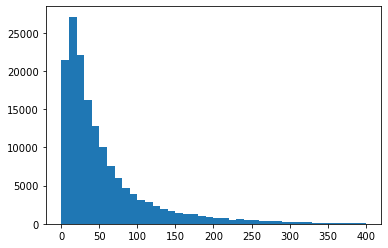

In [50]:
# Have a look at the distribution of number of words in each doc
totalNumWords = [len(one_comment) for one_comment in list_tokenized_docs]
plt.hist(totalNumWords, bins = np.arange(0,410,10))
plt.show()

In [45]:
def split_data(docs, targets):
        length = len(docs)
        split_point = int(round(length * 0.8))
        return docs[:split_point], targets[:split_point], docs[split_point:], targets[split_point:]
    
train_valid_docs, train_valid_targets, test_docs, test_targets = split_data(X_t, list_labels)
train_docs, train_targets, valid_docs, valid_targets = split_data(train_valid_docs, train_valid_targets)

In [46]:
# Tell keras to infer the input shape, in our case it is 200

# We construct the LSTM network here

inp = Input(shape=(maxlen, )) #maxlen=200 as defined earlier
embed_size = 128
x = Embedding(max_features, embed_size)(inp)
x = LSTM(60, return_sequences=True,name='lstm_layer')(x)
x = GlobalMaxPool1D()(x)
x = Dropout(0.1)(x)
x = Dense(50, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(6, activation="sigmoid")(x)
model = Model(inputs=inp, outputs=x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 200, 128)          2560000   
                                                                 
 lstm_layer (LSTM)           (None, 200, 60)           45360     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 60)               0         
 balMaxPooling1D)                                                
                                                                 
 dropout_2 (Dropout)         (None, 60)                0         
                                                                 
 dense_5 (Dense)             (None, 50)                3050      
                                                             

In [47]:
batch_size = 32
epochs = 2

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='saved_models/LSTM.hdf5', verbose=1, save_best_only=True)

model.fit(train_docs, train_targets, validation_data=(valid_docs, valid_targets), 
        epochs=epochs, batch_size=batch_size, callbacks=[checkpointer], verbose=1)

Epoch 1/2
3192/3192 [==============================] - ETA: 0s - loss: 0.0793 - accuracy: 0.9354
Epoch 1: val_loss improved from inf to 0.05073, saving model to saved_models\LSTM.hdf5
3192/3192 [==============================] - 189s 59ms/step - loss: 0.0793 - accuracy: 0.9354 - val_loss: 0.0507 - val_accuracy: 0.9941
Epoch 2/2
3191/3192 [============================>.] - ETA: 0s - loss: 0.0467 - accuracy: 0.9834
Epoch 2: val_loss improved from 0.05073 to 0.04803, saving model to saved_models\LSTM.hdf5
3192/3192 [==============================] - 192s 60ms/step - loss: 0.0467 - accuracy: 0.9834 - val_loss: 0.0480 - val_accuracy: 0.9932


In [48]:
model.load_weights('saved_models/LSTM.hdf5')

evaluation = predictive_evaluate(test_docs, test_targets, model)
print('checkpoint')
print(len(test_docs))
print(len(test_targets))
predictions = np.array(evaluation.get_multilabel_predictions()).astype(int)

print(predictions[200:230])

model_recall_score = recall_score(np.array(test_targets), predictions, average=None)
model_precision_score = precision_score(np.array(test_targets), predictions, average=None)
model_fbeta_score = fbeta_score(np.array(test_targets), predictions, average='weighted', beta=1)

checkpoint
31914
31914
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 1 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 1 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
print(model_recall_score)
print(model_precision_score)
print(model_fbeta_score)

[0.69344748 0.10610932 0.78669862 0.         0.62389381 0.        ]
[0.87823186 0.6875     0.82319749 0.         0.79340836 0.        ]
0.6944821671153109


In [56]:
model_roc_auc_score = roc_auc_score(np.array(test_targets), predictions, average=None)


In [57]:
model_roc_auc_score

0.8938532088171647

In [60]:
np.array(test_targets)

array([0, 0, 0, ..., 0, 0, 1])

In [61]:
predictions

array([0, 0, 0, ..., 0, 0, 1])

In [58]:
fig = sklearn.metrics.plot_roc_curve(model, np.array(test_targets), predictions, *, sample_weight=None, drop_intermediate=True, response_method='auto', name=None, ax=None, pos_label=None, **kwargs)

SyntaxError: iterable argument unpacking follows keyword argument unpacking (Temp/ipykernel_62696/1271216613.py, line 1)

In [63]:
.predict_proba()

AttributeError: 'Sequential' object has no attribute 'predict_proba'

In [75]:
predictions

array([0, 0, 0, ..., 0, 0, 1])

In [65]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(test_targets, predictions)

In [72]:
from sklearn.metrics import auc
auc = auc(model_precision_score, model_recall_score)

In [71]:
from sklearn.metrics import pr_curve

ImportError: cannot import name 'pr_curve' from 'sklearn.metrics' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

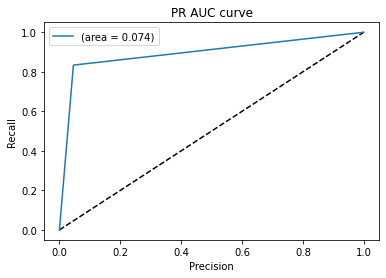

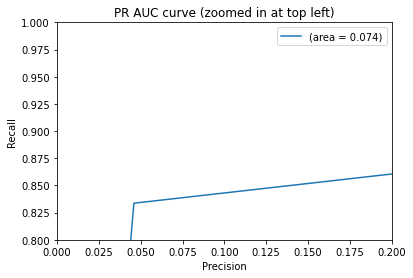

In [73]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='(area = {:.3f})'.format(auc))
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('PR AUC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='(area = {:.3f})'.format(auc))
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('PR AUC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()